In [1]:
# MNIST 데이터 로딩

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [2]:
# 훈련 데이터 확인

mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [3]:
# 테스트 데이터 확인

mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

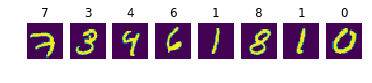

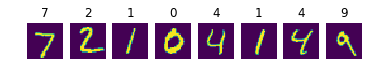

In [4]:
# 손글씨 이미지 시각화

import matplotlib.pyplot as plt

def draw_image(images, labels):
    fig, axes = plt.subplots(1, images.shape[0])
    for i, ax in enumerate(axes.flat):
        ax.set_axis_off()
        ax.imshow(images[i].reshape(28, 28))
        ax.set_title(labels[i])
    plt.show()

draw_image(mnist.train.images[:8],
           mnist.train.labels[:8].argmax(axis=1))

draw_image(mnist.test.images[:8],
           mnist.test.labels[:8].argmax(axis=1))

In [5]:
# 신경망 모델 생성

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10,
                activation='softmax',
                input_shape=mnist.train.images.shape[1:]))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using TensorFlow backend.


In [6]:
# 훈련

model.fit(mnist.train.images,
          mnist.train.labels,
          epochs=10)

Epoch 1/10
55000/55000 [==============================] - 5s - loss: 0.4863 - acc: 0.8734     
Epoch 2/10
55000/55000 [==============================] - 5s - loss: 0.3090 - acc: 0.9136     
Epoch 3/10
55000/55000 [==============================] - 5s - loss: 0.2872 - acc: 0.9190     
Epoch 4/10
55000/55000 [==============================] - 4s - loss: 0.2758 - acc: 0.9221     
Epoch 5/10
55000/55000 [==============================] - 9s - loss: 0.2695 - acc: 0.9245     
Epoch 6/10
55000/55000 [==============================] - 7s - loss: 0.2641 - acc: 0.9266     
Epoch 7/10
55000/55000 [==============================] - 5s - loss: 0.2601 - acc: 0.9274     
Epoch 8/10
55000/55000 [==============================] - 4s - loss: 0.2568 - acc: 0.9292     
Epoch 9/10
55000/55000 [==============================] - 4s - loss: 0.2546 - acc: 0.9289     
Epoch 10/10
55000/55000 [==============================] - 4s - loss: 0.2518 - acc: 0.9305     


In [7]:
# 정확도

_, train_accuracy = model.evaluate(mnist.train.images, mnist.train.labels)
_, test_accuracy = model.evaluate(mnist.test.images, mnist.test.labels)

train_accuracy, test_accuracy

 9472/10000 [===========================>..] - ETA: 0s

(0.93256363636363637, 0.9264)

In [8]:
# 예측

predict = model.predict(mnist.test.images).argmax(axis=1)

predict[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [9]:
# 정답 검사

correct = predict == mnist.test.labels.argmax(axis=1)

correct[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,  True], dtype=bool)

In [10]:
# BONUS: 정확도 계산 공식

correct.mean()

0.9264

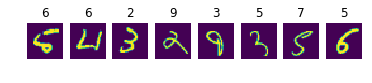

In [11]:
# 오답 시각화

images = mnist.test.images[~correct]
labels = predict[~correct]

draw_image(images[:8], labels[:8])

In [12]:
# CNN 모델 생성

from keras.models import Sequential
from keras.layers import Reshape, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Reshape((28, 28, 1),
                  input_shape=mnist.train.images.shape[1:]))

model.add(Conv2D(4, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(8, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# 훈련

model.fit(mnist.train.images,
          mnist.train.labels,
          epochs=10)

Epoch 1/10
55000/55000 [==============================] - 31s - loss: 0.4799 - acc: 0.8448    
Epoch 2/10
55000/55000 [==============================] - 32s - loss: 0.2258 - acc: 0.9302    
Epoch 3/10
55000/55000 [==============================] - 36s - loss: 0.1889 - acc: 0.9417    
Epoch 4/10
55000/55000 [==============================] - 33s - loss: 0.1711 - acc: 0.9460    
Epoch 5/10
55000/55000 [==============================] - 35s - loss: 0.1557 - acc: 0.9513    
Epoch 6/10
55000/55000 [==============================] - 36s - loss: 0.1477 - acc: 0.9539    
Epoch 7/10
55000/55000 [==============================] - 42s - loss: 0.1434 - acc: 0.9562    
Epoch 8/10
55000/55000 [==============================] - 40s - loss: 0.1393 - acc: 0.9567    
Epoch 9/10
55000/55000 [==============================] - 37s - loss: 0.1314 - acc: 0.9590    
Epoch 10/10
55000/55000 [==============================] - 43s - loss: 0.1299 - acc: 0.9602    


In [14]:
# 정확도

_, train_accuracy = model.evaluate(mnist.train.images, mnist.train.labels)
_, test_accuracy = model.evaluate(mnist.test.images, mnist.test.labels)

train_accuracy, test_accuracy

 9984/10000 [============================>.] - ETA: 0s

(0.98596363636363638, 0.98580000000000001)

In [15]:
# 예측

predict = model.predict(mnist.test.images).argmax(axis=1)

correct = predict == mnist.test.labels.argmax(axis=1)

predict[:10], correct[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool))

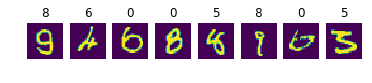

In [16]:
# 오답 시각화

images = mnist.test.images[~correct]
labels = predict[~correct]

draw_image(images[:8], labels[:8])

In [17]:
# RNN 모델 생성

from keras.models import Sequential
from keras.layers import Reshape, GRU, Dropout, Dense

model = Sequential()

model.add(Reshape((14, 28),
                  input_shape=(14 * 28,)))

model.add(GRU(100))
model.add(Dropout(0.25))

model.add(Dense(14 * 28, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# 훈련

model.fit(mnist.test.images[:, :14 * 28],
          mnist.test.images[:, 14 * 28:],
          epochs=10)

Epoch 1/10
10000/10000 [==============================] - 19s - loss: 288.7180 - acc: 0.0151    
Epoch 2/10
10000/10000 [==============================] - 18s - loss: 282.4534 - acc: 0.0122    
Epoch 3/10
10000/10000 [==============================] - 19s - loss: 275.3328 - acc: 0.0328    
Epoch 4/10
10000/10000 [==============================] - 22s - loss: 270.5058 - acc: 0.0314    
Epoch 5/10
10000/10000 [==============================] - 20s - loss: 268.6718 - acc: 0.0383    
Epoch 6/10
10000/10000 [==============================] - 17s - loss: 267.3861 - acc: 0.0444    
Epoch 7/10
10000/10000 [==============================] - 18s - loss: 266.5603 - acc: 0.0464    
Epoch 8/10
10000/10000 [==============================] - 20s - loss: 265.8010 - acc: 0.0492    
Epoch 9/10
10000/10000 [==============================] - 22s - loss: 265.1455 - acc: 0.0573    
Epoch 10/10
10000/10000 [==============================] - 19s - loss: 264.6935 - acc: 0.0602    


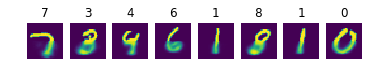

In [19]:
# 예측 및 시각화

import numpy as np

count = 8

images1 = mnist.train.images[:count, :14 * 28]
images2 = model.predict(images1)

images = np.concatenate([images1, images2], axis=1)

draw_image(images, mnist.train.labels[:count].argmax(axis=1))